# Uber Demand & Supply Problem

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Data Cleaning

In [63]:
# Checking if there are any duplicate ids

sum(df.duplicated('Request id')) == 0

True

In [64]:
# Checking the data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [65]:
# Checking for null values

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [66]:
# Shape of the data frame

df.shape

(6745, 6)

In [67]:
# Checking the percentage of missing values to see that if we can drop them or impute them

round((df.isnull().sum()/len(df))*100,2)

# The Driver id and Drop timestamp columns might not be helpful in getting better insights from the data so we can ignore them.

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

### Deriving new columns for better understanding and to derive better insights

In [68]:
# Converting Request timestamp column to Date time object format

df['Request_Date_Time'] = pd.to_datetime(df['Request timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16


In [69]:
# Converting Drop timestamp to Date time object

df['Drop_Date_Time'] = pd.to_datetime(df['Drop timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Date_Time,Drop_Date_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [70]:
# dropping the Request timestamp and Drop timestamp columns as they were of no use

df.drop('Request timestamp', axis = 1, inplace = True)
df.drop('Drop timestamp', axis = 1, inplace = True)
df.head()

,Request id,Pickup point,Driver id,Status,Request_Date_Time,Drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [71]:
# Checking the other data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_Date_Time  6745 non-null   datetime64[ns]
 5   Drop_Date_Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [72]:
# Seperating hourly data for timely view of status data

df['Request_time'] = pd.DatetimeIndex(df['Request_Date_Time']).hour


In [73]:
# Extracting Day column

df['Request_day'] = pd.DatetimeIndex(df['Request_Date_Time']).day
df.head()

,Request id,Pickup point,Driver id,Status,Request_Date_Time,Drop_Date_Time,Request_time,Request_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [74]:
# Removing unnecessary columns to reduce the complexity of data

df.drop(['Request id','Driver id', 'Drop_Date_Time'], axis=1, inplace = True)
df.head()

,Pickup point,Status,Request_Date_Time,Request_time,Request_day
0,Airport,Trip Completed,2016-11-07 11:51:00,11,7
1,Airport,Trip Completed,2016-11-07 17:57:00,17,7
2,City,Trip Completed,2016-12-07 09:17:00,9,7
3,Airport,Trip Completed,2016-12-07 21:08:00,21,7
4,City,Trip Completed,2016-07-13 08:33:16,8,13


In [75]:
# Numerical value count of pickup points

df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

<AxesSubplot:>

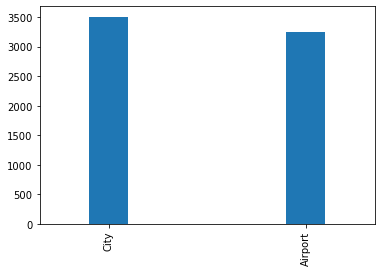

In [76]:
# Plotting the pickup points based on value counts

pickup_point_count = df['Pickup point'].value_counts()
pickup_point_count.plot.bar(width=0.2)

In [77]:
# Comparing Demand and Supply- the trend seems to be almost same for Trip Completed and No Cars Available

Status_counts= df['Status'].value_counts()
Status_counts

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [78]:
# Normalization of Value_counts

Percentage_Of_Status = df['Status'].value_counts(normalize= True)*100 
Percentage_Of_Status

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64

In [79]:
# Finding the Demand of cars

Demand = Status_counts[1]+ Status_counts[2]  # We are unable to provide cars for the categories No Cars Available and Cancelled
Demand

3914

In [2]:
2831+2650+1264

6745

In [ ]:
6745

In [80]:
# Finding the Supply

Supply = Status_counts[0]  # Trip Completed comes under Supply category as we are providing cars to these rides
Supply

2831

In [81]:
Demand-Supply   # Gap in Demand and Supply

1083

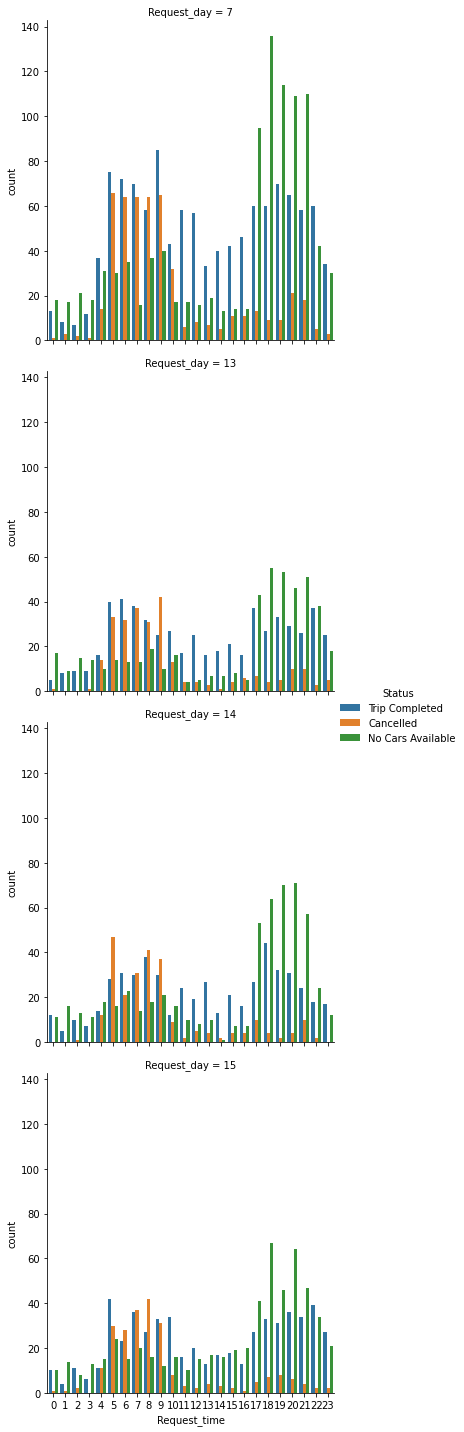

In [82]:
# We need to look into the Status column, as it consists of trip information

sns.factorplot(data = df ,x= 'Request_time', hue = 'Status', row = 'Request_day', kind= 'count')

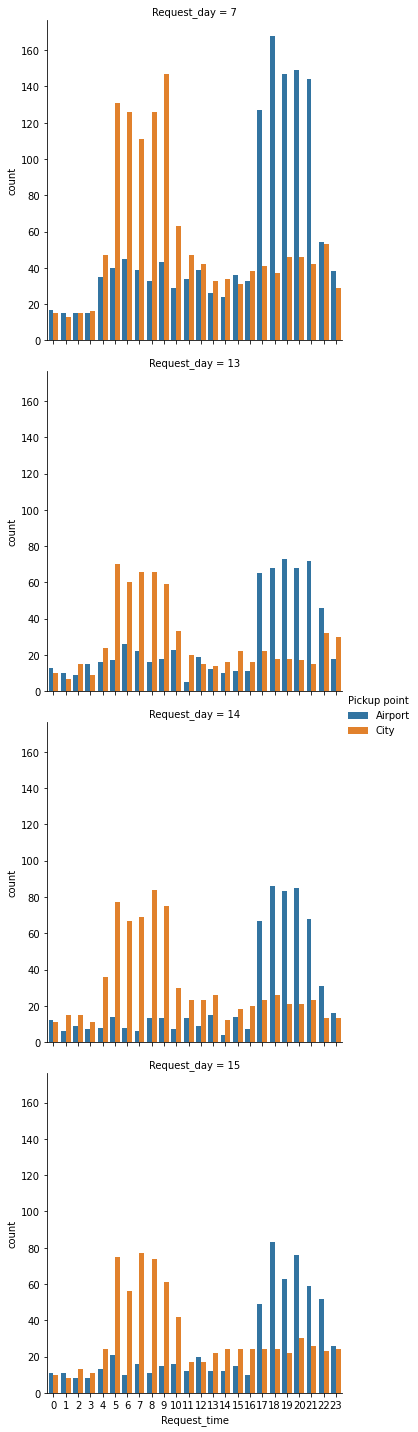

In [83]:
# Request_time and Request_day with respect to Pickup point

sns.factorplot(data = df ,x= 'Request_time', hue = 'Pickup point', row = 'Request_day', kind= 'count')

In [84]:

def time_period(x):
    if x < 5:
        return 'Early Morning'
    elif  5 <= x < 10:
        return 'Morning'
    elif 10 < x < 12:
        return 'Daytime'
    elif 12 <= x < 17:
        return 'Afternoon'
    elif 17 <= x < 22:
        return 'Evening'
    else:
        return 'Night'

In [85]:
df['Time_Slot']= df['Request_time'].apply(time_period)

In [86]:
df.head()

,Pickup point,Status,Request_Date_Time,Request_time,Request_day,Time_Slot
0,Airport,Trip Completed,2016-11-07 11:51:00,11,7,Daytime
1,Airport,Trip Completed,2016-11-07 17:57:00,17,7,Evening
2,City,Trip Completed,2016-12-07 09:17:00,9,7,Morning
3,Airport,Trip Completed,2016-12-07 21:08:00,21,7,Evening
4,City,Trip Completed,2016-07-13 08:33:16,8,13,Morning


In [87]:
# Getting counts for each time slot

df['Time_Slot'].value_counts()

Evening          2342
Morning          2103
Afternoon         810
Night             741
Early Morning     578
Daytime           171
Name: Time_Slot, dtype: int64

<AxesSubplot:>

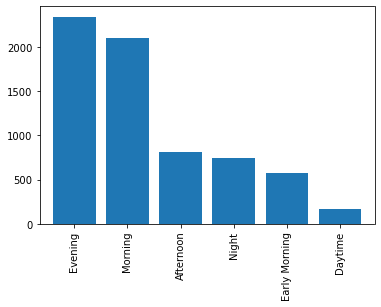

In [88]:
# Plotting based on value counts of respective Time slots

Time_slots = df['Time_Slot'].value_counts()

Time_slots.plot.bar( width = 0.8)

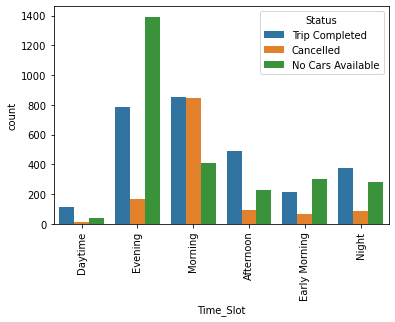

In [89]:
# Plotting Time_Slot with status to get Time based view

sns.countplot(data= df, x= 'Time_Slot', hue = 'Status')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

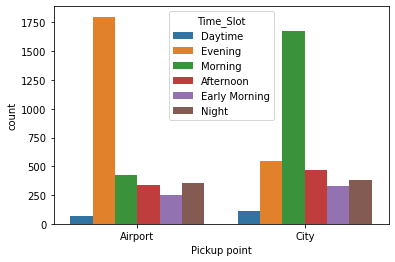

In [90]:
# To find which pickup point has rush with respect to time slots

sns.countplot(data= df, x= 'Pickup point', hue = 'Time_Slot')

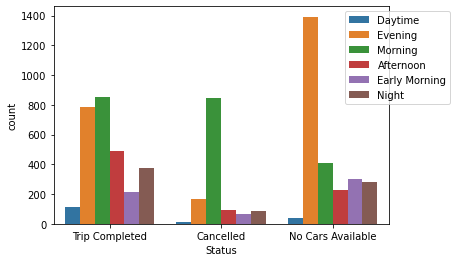

In [91]:
# Observing the trend of Status with respect to Time_Slots 

fig = sns.countplot(data = df, x='Status', hue = 'Time_Slot')
fig.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [92]:
# We saw a heavy rush in the morning time, So plotting 

Morning_data = df[df['Time_Slot'] == 'Morning']

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

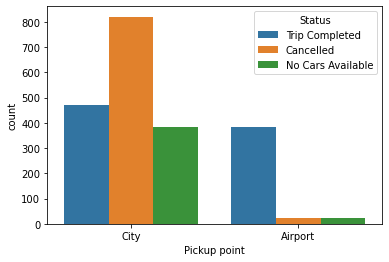

In [93]:
# Plotting Morning_data to observe the trend based on Status column

sns.countplot(data= Morning_data, x= 'Pickup point', hue = 'Status')

#### Trip Cancellation is high in City for Morning

In [94]:
# We saw almost same rush in the evening time, So plotting 

Evening_data = df[df['Time_Slot'] == 'Evening']

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

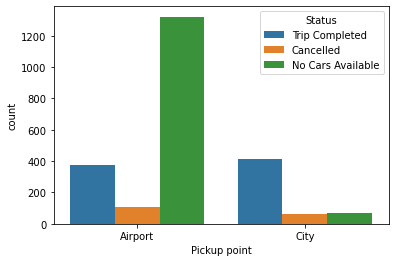

In [95]:
# Plotting Evening_data to observe the trend based on Status column

sns.countplot(data= Evening_data, x= 'Pickup point', hue = 'Status')

#### No Car Availability is high in evening time for Airport and less for City

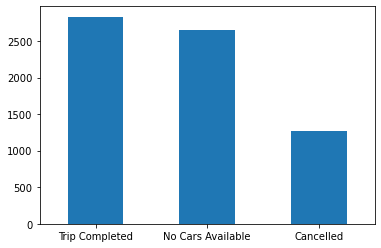

In [96]:
# Observing the flow of status based on value counts

Status_count = df['Status'].value_counts()
Status_count.plot.bar()
plt.xticks(rotation = 0) 
plt.show()

### Calculating Demand and Supply for Morning

In [97]:
# Seperating Cancelled Data for Airport

Airport_cancelled_data = Morning_data.loc[(df['Pickup point']== 'Airport') & (df['Status']== 'Cancelled')] 
len(Airport_cancelled_data)

23

In [98]:
# Finding cancelled cars in Morning from city

City_cancelled_data = Morning_data.loc[(df['Pickup point']== 'City') & (df['Status']== 'Cancelled')] 
len(City_cancelled_data)

820

In [99]:
# Finding the number of Trips Completed where pickup point is City

City_completed_data = Morning_data.loc[(df['Pickup point']== 'City') & (df['Status']== 'Trip Completed')] 
len(City_completed_data)

472

In [100]:
# Finding the number of Morning rides picked from city

City_morning_data = Morning_data.loc[(df['Pickup point']== 'City')] 
len(City_morning_data)

1677

In [101]:
# Finding number of rides completed picked from Airport

Airport_completed_data = Morning_data.loc[(df['Pickup point']== 'Airport') & (df['Status']== 'Trip Completed')] 
len(Airport_completed_data)

382

In [102]:
# Finding number of rides picked from Airport

Airport_morning_data = Morning_data.loc[(df['Pickup point']== 'Airport')] 
len(Airport_morning_data)

426

### Calculating Demand and Supply for Evening

In [103]:
Evening_data.head()

,Pickup point,Status,Request_Date_Time,Request_time,Request_day,Time_Slot
1,Airport,Trip Completed,2016-11-07 17:57:00,17,7,Evening
3,Airport,Trip Completed,2016-12-07 21:08:00,21,7,Evening
5,Airport,Trip Completed,2016-07-13 21:57:28,21,13,Evening
8,City,Trip Completed,2016-07-15 17:57:27,17,15,Evening
15,Airport,Trip Completed,2016-07-13 17:23:18,17,13,Evening


In [104]:
# Getting the count of rides cancelled in evening picked from Airport

Evng_Airport_cancelled_data = Evening_data.loc[(df['Pickup point']== 'Airport') & (df['Status']== 'Cancelled')] 
len(Evng_Airport_cancelled_data)

106

In [105]:
# Finding number of rides cancelled in evening picked from City

Evng_City_cancelled_data = Evening_data.loc[(df['Pickup point']== 'City') & (df['Status']== 'Cancelled')] 
len(Evng_City_cancelled_data)

60

In [106]:
# Finding the number of rides completed that are picked from City

Evng_City_completed_data = Evening_data.loc[(df['Pickup point']== 'City') & (df['Status']== 'Trip Completed')] 
len(Evng_City_completed_data)

411

In [107]:
# Finding count of rides in city data for Evening

Evng_City_data = Evening_data.loc[(df['Pickup point']== 'City')] 
len(Evng_City_data)

542

In [108]:
# Finding the number of completed rides picked from Airport

Evng_Airport_completed_data = Evening_data.loc[(df['Pickup point']== 'Airport') & (df['Status']== 'Trip Completed')] 
len(Evng_Airport_completed_data)

373

In [109]:
# the number of rides picked from Airport

Evng_Airport_data = Evening_data.loc[(df['Pickup point']== 'Airport')] 
len(Evng_Airport_data)

1800

In [110]:
# Finding the number of no cars available from Airport in the morning

Morning_Airport_Unavail= Morning_data[(Morning_data['Pickup point'] == 'Airport') & (Morning_data['Status']== 'No Cars Available')]
len(Morning_Airport_Unavail)

21

In [111]:
#  Finding the number of no cars availability from City in the morning

Morning_City_Unavail= Morning_data[(Morning_data['Pickup point'] == 'City') & (Morning_data['Status']== 'No Cars Available')]
len(Morning_City_Unavail)

385

In [112]:
# Finding the number of cabs unavailable from Airport in the evening

Evening_Airport_Unavail=Evening_data[(Evening_data['Pickup point'] == 'Airport') & (Evening_data['Status']== 'No Cars Available')]
len(Evening_Airport_Unavail)

1321

In [113]:
# Finding the number of cars unavailable from City in the evening

Evening_City_Unavail=Evening_data[(Evening_data['Pickup point'] == 'City') & (Evening_data['Status']== 'No Cars Available')]
len(Evening_City_Unavail)

71

In [114]:
# Creating pie_chart for reusability

def pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct= '%.1f')
    ax1.axis("equal")
    plt.show()

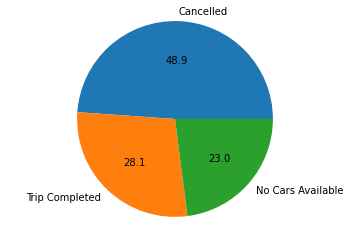

In [115]:
# Trend of city data for Morning

df_city = df.loc[ (df['Pickup point']=="City") & (df['Time_Slot']=="Morning")]
df_city_counts = pd.DataFrame(df_city['Status'].value_counts())
pie_chart(df_city_counts)


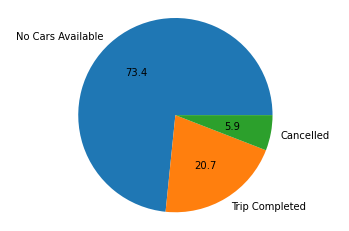

In [116]:
# Trend of Airport for Evening

df_airport = df.loc[ (df['Pickup point']=="Airport") & (df['Time_Slot']=="Evening")]
df_airport_counts = pd.DataFrame(df_airport['Status'].value_counts())
pie_chart(df_airport_counts)